### Import

In [1]:
# Standard Python modules
import os, sys
import yaml
import numpy as np
import pandas as pd
import xarray as xr
# matplotlib
import matplotlib.pyplot as plt

# plot styles/formatting
import seaborn as sns
import cmocean.cm as cmo
import cmocean

In [2]:
# Set up paths

path_to_data = '/home/nash/DATA/data/'                                      # project data -- read only
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

### AR Data

In [9]:
mode = 'max'

if mode == 'mean':
    df = pd.read_csv(path_to_out + 'DJFMAM_ivt_ar_types_ERA5_prec_mean.csv')
    ylim_max = 150
elif mode == 'max':
    df = pd.read_csv(path_to_out + 'DJF_ivt_ar_types_freezing_level_max_prec_new.csv')
    ylim_max = 375
elif mode == 'perc':
    df = pd.read_csv(path_to_out + 'DJFMAM_ivt_ar_types_ERA5_prec_perc.csv')
    ylim_max = 305

In [10]:
## add month and year columns
df = df.drop(columns=['Unnamed: 0'])
frame = pd.to_datetime(df.start_date.values)
frame = pd.DataFrame([frame]).transpose()
frame['date']= frame
df['month']= frame['date'].dt.month
df['year']= frame['date'].dt.year

## select only AR events that resulted in more than 0.1 mm of rainfall per event
idx = (df.prec > 0.1)
df = df.loc[idx]
print(len(df))

df

786


,date,trackID,ar_cat,start_date,end_date,duration,landslideID,landslide_lat,landslide_lon,prec,...,western_high,northwestern_low,northwestern_high,eastern_low,eastern_high,western_freeze,northwestern_freeze,eastern_freeze,month,year
0,1979-12-02,2861.0,1.0,1979-12-02 00:00:00,1979-12-02 18:00:00,18.0,NaN,NaN,NaN,13.718994,...,410.474576,-277.262466,254.583280,-556.359117,243.805053,1,1,-1,12,1979
1,1979-12-01,2861.0,2.0,1979-12-01 00:00:00,1979-12-02 00:00:00,24.0,NaN,NaN,NaN,17.533569,...,538.542225,NaN,550.066162,-687.720702,324.721934,1,1,-1,12,1979
2,1979-12-09,2871.0,1.0,1979-12-09 06:00:00,1979-12-09 18:00:00,12.0,NaN,NaN,NaN,5.676636,...,570.413285,NaN,264.630210,-638.594000,186.723207,1,1,-1,12,1979
3,1979-12-08,2871.0,2.0,1979-12-08 06:00:00,1979-12-09 00:00:00,18.0,NaN,NaN,NaN,8.985474,...,562.519768,NaN,525.196476,-593.690705,217.179775,1,1,-1,12,1979
5,1979-12-17,2975.0,3.0,1979-12-17 00:00:00,1979-12-17 06:00:00,6.0,NaN,NaN,NaN,17.352539,...,NaN,-131.331162,266.444607,-802.096179,NaN,-1,1,-1,12,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,2014-12-14,114051.0,3.0,2014-12-14 06:00:00,2014-12-15 00:00:00,18.0,NaN,NaN,NaN,3.493530,...,NaN,-543.774776,NaN,-112.866271,312.752505,-1,-1,1,12,2014
983,2014-12-31,114196.0,3.0,2014-12-31 18:00:00,2015-01-03 12:00:00,66.0,NaN,NaN,NaN,4.890137,...,NaN,NaN,NaN,-153.051697,620.529686,-1,0,1,12,2014
984,2015-01-03,114217.0,3.0,2015-01-03 18:00:00,2015-01-04 00:00:00,6.0,NaN,NaN,NaN,4.515137,...,NaN,-270.614868,NaN,-153.740778,740.600011,-1,-1,1,1,2015
986,2015-01-29,114402.0,3.0,2015-01-29 12:00:00,2015-01-30 18:00:00,30.0,NaN,NaN,NaN,48.576172,...,NaN,-452.952213,NaN,-149.184701,NaN,-1,-1,-1,1,2015


In [27]:
## fix ivtdir
## strip units and convert to float
X = np.asarray(df['ivtdir']) # single variable

X = float(x.strip(" degree"))

X


224.91021331187994

In [5]:
## Show trends of mean IVT for each type of AR


In [21]:
## select NW AR type
idx = (df.ar_cat == 2)
data1 = df.loc[idx]

## select events above 85th percentile of Zagros area precip
prec_thres_zag = data1['zagros'].describe(percentiles=[.85]).loc['85%']
idx = (df.zagros >= prec_thres_zag)
data2 = df.loc[idx]
print(len(data2))
# data2

## select events above 95th percentile of Northwestern area precip
prec_thres_nw = data1['northwestern'].describe(percentiles=[.85]).loc['85%']
idx = (df.northwestern >= prec_thres_nw)
data3 = df.loc[idx]
print(len(data3))


98
161
510


In [13]:
artype_lst = [1, 2, 3]
for i, ar_type in enumerate(artype_lst):
    
    # select DJF cases
    idx = (data1.ar_cat == ar_type) 
    data1 = data1.loc[idx]
    
    ## get 85th percentile of ivt and precip
    ivt_thres = data1['ivt'].describe(percentiles=[.85]).loc['85%']
    prec_thres = data1['prec'].describe(percentiles=[.85]).loc['85%']
    
    # select only events above 85th percentile
    idx = (data1['prec'] >= prec_thres) & (data1['ivt'] >= ivt_thres)
    data_new = data1.loc[idx]
    
    print(len(data_new))

33
27
16


In [28]:
df.ivt.max()

913.6138814030838

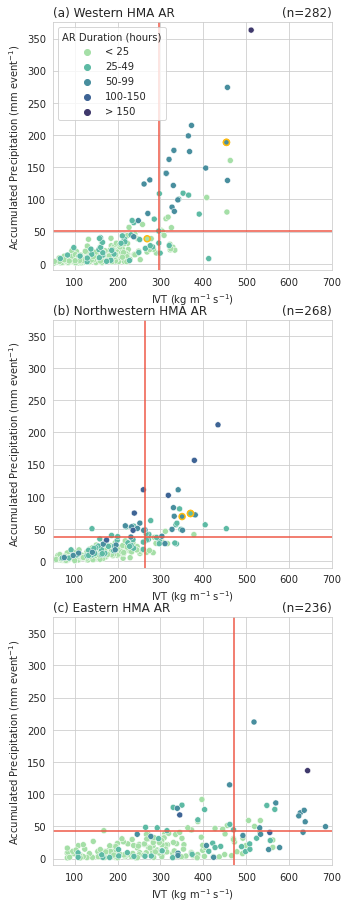

../figs/ivt_precip_scatter_era5_max_1col.png


In [30]:
## update plot so that it is 3 columns (ar type) by 1 rows (location of precip)
fname = path_to_figs + 'ivt_precip_scatter_era5_' + mode + '_1col'
fmt = 'png'
nrows = 3
ncols = 1
nplots=nrows*ncols

fig = plt.figure(figsize=(5,15.5))

region_lst = ['western'] + ['northwestern'] + ['eastern']
artype_lst = [1, 2, 3]
plt_lbl = ['(a) Western HMA AR', '(b) Northwestern HMA AR', '(c) Eastern HMA AR']

colors = np.array(([239/256, 86/256, 69/256, 1], # UCSB coral
                   [254/256, 188/256, 17/256, 1], # UCSB gold
                   [4/256, 124/256, 145/256], # UCSB aqua
                   [156/256, 190/256, 190/256], # UCSB mist
                  ), dtype='object')

case_study = [(71513, 97756), (71513, 97756), (71513, 97756)]

sns.set_style("whitegrid")
legend_lst = [True, False, False]

for i, ar_type in enumerate( artype_lst):
    ax = fig.add_subplot(nrows, ncols, i+1)
    
    # plot ALL cases
    idx = ((df.month >= 12) | (df.month <= 2))
    data1 = df.loc[idx]
    idx = (data1.ar_cat == ar_type) 
    data1 = data1.loc[idx]
    n = len(data1)
    # sort data
    test=data1.sort_values('duration')
    test['AR Duration (hours)'] = pd.cut(test["duration"], [0, 25, 50, 100, 150, 300], labels=["< 25", "25-49", "50-99", "100-150", "> 150"])
    cpal = sns.color_palette("cmo.deep", n_colors=5)
    g = sns.scatterplot(data=test, x="ivt", y="prec", ax=ax, hue='AR Duration (hours)',  palette=cpal, legend=legend_lst[i])
    
    ## get 85th percentile of ivt and precip
    ivt_thres = data1['ivt'].describe(percentiles=[.85]).loc['85%']
    prec_thres = data1['prec'].describe(percentiles=[.85]).loc['85%']
    
    plt.axhline(y=prec_thres, color=colors[0], linestyle='-')
    plt.axvline(x=ivt_thres, color=colors[0], linestyle='-')
    
    # # plot case study points
    idx = (test.trackID == case_study[i][0]) | (test.trackID == case_study[i][1])
    # idx = (data1.trackID == 97756)
    data3 = test.loc[idx]
    kwargs = {'edgecolor': colors[1], 'linewidth': 1.5}
    gb = sns.scatterplot(data=data3, x="ivt", y="prec", ax=ax, marker='o', hue='AR Duration (hours)',  palette=cpal, **kwargs, legend=False)
    # gb = sns.scatterplot(data=data3, x="ivt", y="prec", ax=ax, marker='o', color=colors[1], s=100, ms=100, mec=colors[1], mfc="None")
    
#     # plot landslide cases
#     idx = (data1.landslide == 1) & (np.abs(data1.landslide_lat - data1.hlat) < 10) & (np.abs(data1.landslide_lon - data1.hlon) < 10)
#     data2 = data1.loc[idx]
#     print(len(data2))
#     ga = sns.scatterplot(data=data2, x="ivt", y="prec", ax=ax, marker='X', color=colors[0])
    
    
    ax.set_ylabel('Accumulated Precipitation (mm event$^{-1}$)')
    ax.set_xlabel('IVT (kg m$^{-1}$ s$^{-1}$)')
    ax.set_ylim(-10, 375)
    ax.set_xlim(50, 700)
    ax.set_title(plt_lbl[i], loc='left')
    ax.set_title('(n={0})'.format(n), loc='right')
    
# sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=5, title="Duration of AR", frameon=False) ## only works with seaborn version 0.11.2

# Save the figure
fig.savefig('%s.%s' % (fname, fmt), bbox_inches='tight', dpi=300)
plt.show()
fig.clf()

plotFile = fname + '.png'
print(plotFile)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [20]:

X

array(['224.91021331187994 degree', '231.68037841051355 degree',
       '238.21083942230604 degree', '263.4872290823872 degree',
       '239.33782054715033 degree', '282.46317475764266 degree',
       '227.3018853535805 degree', '241.78506602468397 degree',
       '232.9664085188166 degree', '202.5035552575598 degree',
       '249.36328996963186 degree', '204.66874838608607 degree',
       '276.0858156297321 degree', '219.02575830965966 degree',
       '231.69766913492586 degree', '257.76348581339664 degree',
       '270.7111760870372 degree', '271.1366008508976 degree',
       '168.63874752711612 degree', '251.94196875166728 degree',
       '208.65298437164108 degree', '226.35538568887307 degree',
       '259.4747562815623 degree', '258.39099410442924 degree',
       '205.52775331060346 degree', '221.47436422565912 degree',
       '237.69827235619803 degree', '261.27232533375695 degree',
       '218.292266722612 degree', '141.7178851445197 degree',
       '265.37094377693404 degree', 

In [23]:

x = X[0].strip(" degree")
float(x)

224.91021331187994

In [19]:
for i, (region, ar_type) in enumerate(zip(region_lst, artype_lst)):
    # plot ALL cases
    idx = ((df.month >= 12) | (df.month <= 2))
    data1 = df.loc[idx]
    idx = (data1.ar_cat == ar_type) 
    data1 = data1.loc[idx]
    print(len(data1))
    
    # X = data1['ivt'] # single variable
    # X = data1['duration'] # single variable
    X = data1['ivtdir'] # single variable
    # X = np.column_stack((data1['ivt'], data1['duration'])) # multiple linear regression
    y = data1['prec']

    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2, missing='drop')
    est2 = est.fit()
    print(est2.summary())
    
    
    


282


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
X = data['TV']
y = data['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())